# MASK

Mask of burned areas using landsat 8 Spectral indices

<b>Imports

In [1]:
import matplotlib.pyplot as plt
from osgeo import gdal
from osgeo import osr
import numpy as np

<b> Open TIF

In [2]:
try:
	RGB = gdal.Open("RGB.TIF")
	print ("Arquivo aberto com sucesso")
except:
	print("Erro na abertura do arquivo")
	exit()

Arquivo aberto com sucesso


<b> RGB.GIF
<img src="imgs/images.png" alt="drawing" width="500"/>

<b> Read Raster Bands

In [3]:
NDWI_T2 = RGB.GetRasterBand(1).ReadAsArray().astype(np.float32)
NDVI_DIF = RGB.GetRasterBand(2).ReadAsArray().astype(np.float32)
BAI_T2 = RGB.GetRasterBand(3).ReadAsArray().astype(np.float32)
print ("Bandas Convertidas")

Bandas Convertidas


<b> Build Composition

In [4]:
rgb = NDVI_DIF*0.6 + NDWI_T2*0.3 + BAI_T2*0.3 
rgb = np.divide(rgb, 1.32817e-18)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in true_divide
  


<b> Plot

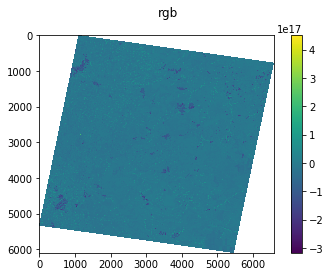

In [5]:
plt.suptitle('rgb')
plt.imshow(rgb)
plt.colorbar()
plt.show()

<b> Cut

In [6]:
output = np.full_like(NDVI_DIF, 3, dtype=np.int8)
data_masked = np.ma.MaskedArray(output, rgb <= -0.59e17)

<b> Mask

In [7]:
data_masked = np.select([data_masked != 3, data_masked == 3], [np.ones_like(data_masked), np.full_like(data_masked, 3, dtype=np.int8)])

<b> Plot

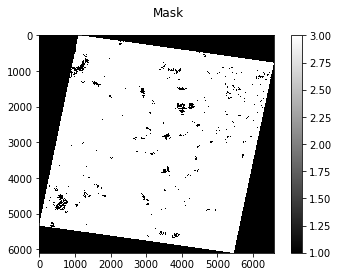

In [8]:
plt.suptitle('Mask')
plt.imshow(data_masked, cmap='gray')
plt.colorbar()
plt.show()

<b> Save

In [9]:
filename_output = "AREA_Q.TIF"
geotiff = gdal.GetDriverByName('GTiff')
dataset_output = geotiff.Create(filename_output, RGB.RasterXSize, RGB.RasterYSize, 1, gdal.GDT_Int16)
dataset_output.SetGeoTransform(RGB.GetGeoTransform())
dataset_output.SetProjection(RGB.GetProjectionRef())
dataset_output.GetRasterBand(1).WriteArray(data_masked)
dataset_output.FlushCache()
dataset_output = None
print ("Arquivos salvo com sucesso")

Arquivos salvo com sucesso
